In [3]:
import pandas as pd
import numpy as np
import altair as alt

In [4]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Using altair data server to prevent notebook size from getting too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [6]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [7]:
master_df = pd.read_csv('data/master.csv')

In [8]:
master_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1465.0,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,176.0,nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1086.0,nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.5,105.0,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1791.0,nm0005690,\N


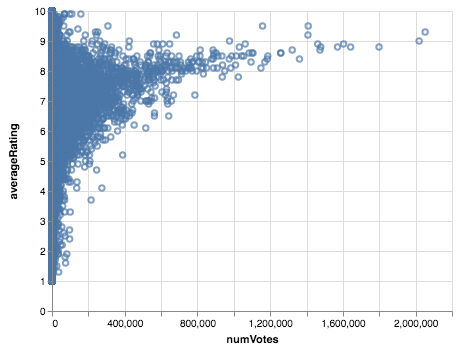

In [9]:
alt.Chart(master_df).mark_point().encode(
    alt.X('numVotes:Q'),
    alt.Y('averageRating:Q')
)

In [ ]:
alt.Chart(master_df).mark_bar().encode(
    alt.X('averageRating:O', bin=alt.Bin(maxbins=10)),
    alt.Y('count()'),
    alt.Color('median(numVotes)')
)

In [ ]:
temp_df = master_df.copy()
temp_df['numVotes'] = np.log(temp_df['numVotes'].astype(float))
alt.Chart(temp_df).mark_point().encode(
    alt.X('averageRating:O', bin=True),
    alt.Y('numVotes:Q', bin=True),
    size='count()'
)

In [10]:
test = master_df[master_df.startYear != '\\N']

In [11]:
test['decade'] = test['startYear'].astype(int)//10*10

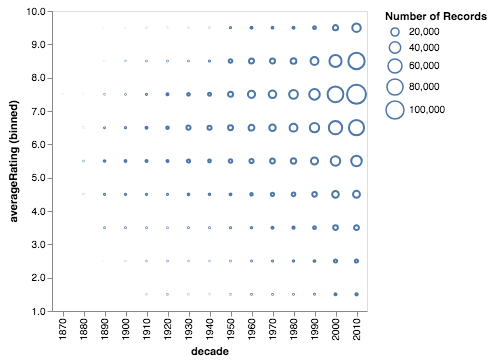

In [14]:
alt.Chart(test).mark_point().encode(
    alt.X('decade:N'),
    alt.Y('averageRating', bin=True),
    size='count()'
)

In [36]:
chart = alt.Chart(test).mark_circle(opacity=0.8, stroke='red', strokeWidth=1).encode(
    alt.X('decade:N'),
    alt.Y('averageRating'),
    size='count()'
)

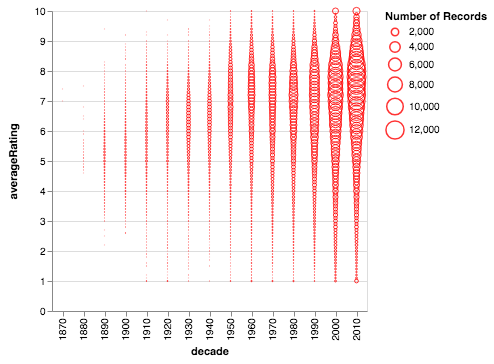

In [37]:
chart

In [42]:
alt.themes.enable('opaque')
chart.save('plots/beautiful.png', scale_factor=2.0)

ProtocolError: ('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

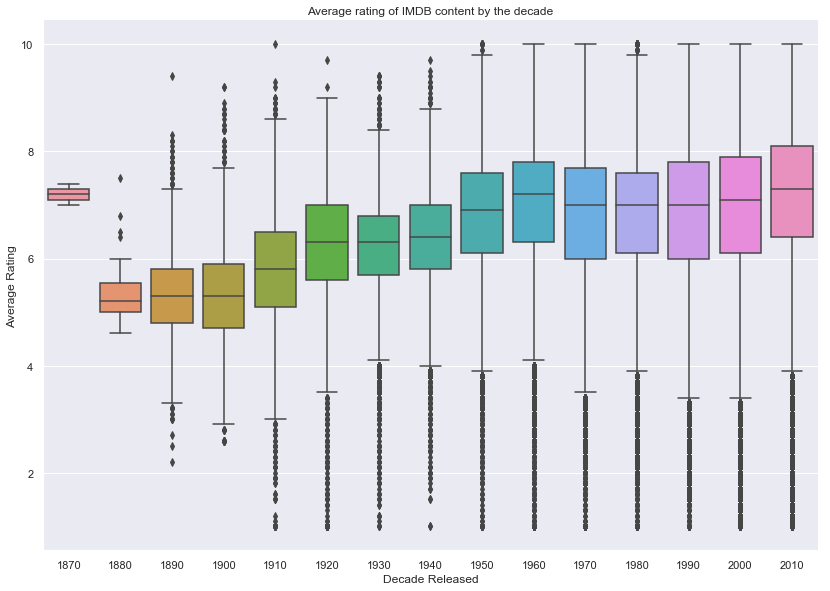

In [35]:
sns.set()
g = sns.catplot(x="decade", y="averageRating", kind="box", data=test, height=8.27, aspect=11.7/8.27)
plt.xlabel('Decade Released')
plt.ylabel('Average Rating')
plt.title('Average rating of IMDB content by the decade')
plt.show('g')

In [47]:
documentaries = test[test['genres'].str.contains("Documentary", na=False)]

In [48]:
documentaries.shape

(103460, 14)

In [50]:
documentaries.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,decade
918887,tt9717118,tvEpisode,Black Memorabilia,Black Memorabilia,0,2019,\N,\N,Documentary,6.6,5.0,\N,\N,2010
918891,tt9723132,tvEpisode,The Walking Dead,The Walking Dead,0,2019,\N,\N,"Documentary,Talk-Show",7.6,42.0,\N,\N,2010
918894,tt9723750,tvMovie,Teachers Training to Kill,Teachers Training to Kill,0,2019,\N,\N,Documentary,7.8,5.0,\N,\N,2010
918915,tt9746500,movie,Earth,Erde,0,2019,\N,115,Documentary,7.2,10.0,nm0315430,nm0315430,2010
918921,tt9752312,short,O Imbecil Coletivo,O Imbecil Coletivo,0,2018,\N,\N,"Documentary,Short",9.8,13.0,nm9894806,nm9903994,2010


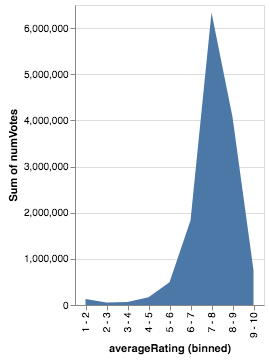

In [58]:
alt.Chart(documentaries).mark_area().encode(
    alt.X('averageRating:O', bin=True),
    alt.Y('sum(numVotes):Q')
)

In [105]:
top_documentaries = documentaries[documentaries['numVotes'] > 1000]

In [106]:
top_documentaries = top_documentaries[top_documentaries['averageRating'] > 7.0]

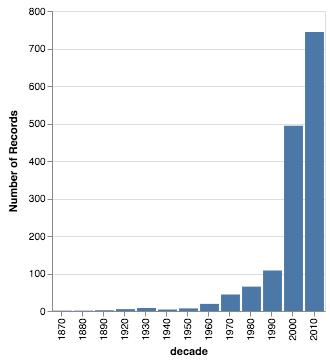

In [107]:
alt.Chart(top_documentaries).mark_bar().encode(
    alt.X('decade:O'),
    alt.Y('count():Q')
)

In [73]:
top_documentaries[top_documentaries['decade'] == 1870]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,decade
613369,tt2221420,short,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop,0,1878,\N,1,"Documentary,Short",7.4,1681.0,nm1155956,\N,1870


In [74]:
top_documentaries[top_documentaries['decade'] == 1880]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,decade
207843,tt0392728,short,Roundhay Garden Scene,Roundhay Garden Scene,0,1888,\N,1,"Documentary,Short",7.5,4770.0,nm1284117,\N,1880


In [75]:
top_documentaries[top_documentaries['decade'] == 1890]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,decade
11,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short",7.4,8815.0,"nm0525908,nm0525910",\N,1890
137295,tt0227672,short,Tossing a Nigger in a Blanket,Tossing a Nigger in a Blanket,0,1898,\N,1,"Documentary,Short",7.5,1897.0,nm0657635,\N,1890


In [108]:
perfect_documentaries = top_documentaries[top_documentaries['averageRating'] >= 9.0]

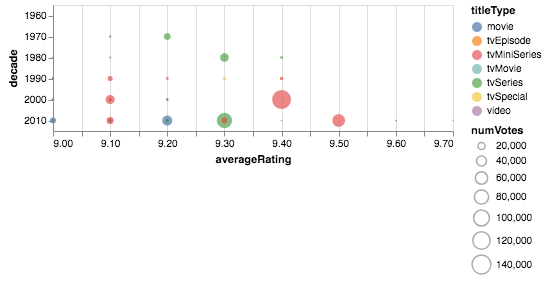

In [109]:
alt.Chart(perfect_documentaries).mark_circle().encode(
    alt.X('averageRating:Q', scale=alt.Scale(zero=False)),
    alt.Y('decade:O'),
    color=('titleType'),
    size=('numVotes'),
    tooltip=['primaryTitle']
)

In [110]:
test_doc = perfect_documentaries.sort_values('averageRating', ascending=False)

In [111]:
test_doc = test_doc.head(20)

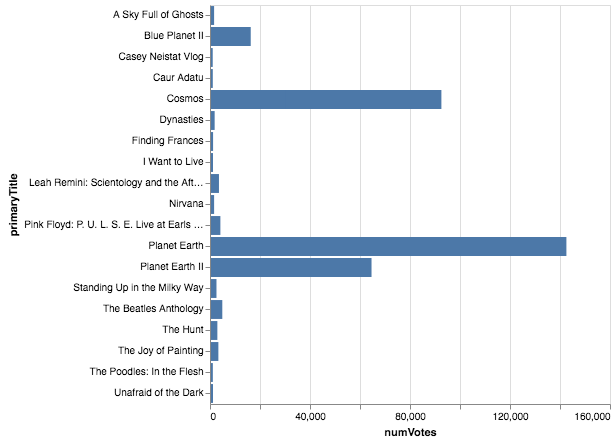

In [116]:
alt.Chart(test_doc).mark_bar().encode(
    alt.Y('primaryTitle'),
    alt.X('numVotes:Q'),
    tooltip=['primaryTitle']
)